# Knowledge density

We then predict the probability that individual, organization, or country, $s$ will increase its level of development in field $f$ by creating an indicator of the fraction of fields that are connected to field $f$ and that are already developed by $s$.

In [1]:
import sys
sys.path.append("../")
from lib.rs import research_space

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

We will compare our predictions based on data before 2011 to the true transitions that occured before 2020. So we need to load both:

In [3]:
key = "sjr"

In [4]:
rs_2011 = research_space(key)
rs_2011.load(2011)
rs_2011.set_institution("../../dataset/lattes/pesquisadores.csv", sep=";sep;")
rs_2011.advantages()
rs_2011.set_indicators()

In [5]:
rs_2020 = research_space(key)
rs_2020.load(2020)
rs_2020.set_institution("../../dataset/lattes/pesquisadores.csv", sep=";sep;")
rs_2020.advantages()
rs_2020.set_indicators()

### Prediction

Finally, to predict a transition of entity in field f between a pair of states (i.e. from inactive to active), we look at all fields that are in the initial state (i.e. inactive) and sort them by density ($\omega_{sf}$).

*evaluating the transition from an inactive to an active state*

In [6]:
# Laender
rs_2011.predict(9089204821424223, 'scientist', 'inactive-active')[:10]

[(0.32347, 'museology'),
 (0.30288, 'logic'),
 (0.30098, 'theoretical computer science'),
 (0.29712, 'signal processing'),
 (0.27709, 'human-computer interaction'),
 (0.25527, 'computer graphics and computer-aided design'),
 (0.22943, 'media technology'),
 (0.19965, 'control and systems engineering'),
 (0.18579, 'information systems and management'),
 (0.17672, 'nature and landscape conservation')]

In [7]:
# Ana
rs_2011.predict(2408991231058279, 'scientist', 'inactive-active')[:10]

[(0.09604, 'media technology'),
 (0.08851, 'information systems'),
 (0.07919, 'theoretical computer science'),
 (0.07389, 'human-computer interaction'),
 (0.0667, 'computer science (miscellaneous)'),
 (0.0663, 'signal processing'),
 (0.06499, 'logic'),
 (0.06089, 'computer graphics and computer-aided design'),
 (0.05979, 'computer vision and pattern recognition'),
 (0.05901, 'artificial intelligence')]

*evaluating the transition from an nascent to an developed state*

In [44]:
# UFMG
rs_2011.predict('universidade federal de minas gerais', 'institution', 'nascent-developed')[:10]

[(0.59663, 'speech and hearing'),
 (0.58969, 'advanced and specialized nursing'),
 (0.57981, 'anatomy'),
 (0.56242, 'developmental neuroscience'),
 (0.55264, 'orthodontics'),
 (0.54653, 'colloid and surface chemistry'),
 (0.54627, 'anesthesiology and pain medicine'),
 (0.54584, 'urology'),
 (0.50652, 'medical and surgical nursing'),
 (0.49899, 'anthropology')]

*evaluating the transition from an intermediate to an developed state*

In [9]:
# UFMG
rs_2011.predict('universidade federal de minas gerais', 'institution', 'intermediate-developed')[:10]

[(0.77019, 'family practice'),
 (0.64315, 'optometry'),
 (0.62049, 'endocrinology'),
 (0.61979, 'histology'),
 (0.6148, 'hematology'),
 (0.60292, 'transplantation'),
 (0.56512, 'behavioral neuroscience'),
 (0.56089, 'classics'),
 (0.55908, 'cardiology and cardiovascular medicine'),
 (0.55858, 'cell biology')]

### Accuracy

To measure the accuracy of our predictions we use the area under the Response Operator Characteristics curve (ROC curve). The ROC curve plots the true positive rate of a predictive algorithm (in  the  y-axis) against its false positive rate (x-axis). A random prediction, having the same rate of true positives and false positives, produces  a  ROC curve with an area of 0.5, so values between 0.5 and 1 represent the accuracy of the predictive method.

In [41]:
def accuracy(level, transition):
    auc = list()
    dic = {x: rs_2020.fields.index(x) for x in rs_2011.fields}
    rng = [rs_2011.scientists, set(x[0] for x in rs_2011.rca[1]), set(x[0] for x in rs_2011.rca[2])]
    u = 0 if transition == 'inactive-active' else 1
    
    if level == 'scientist':
        lev = 0
    elif level == 'institution':
        lev = 1
    elif level == 'state':
        lev = 2

    for s in rng[lev]:
        pred = rs_2011.predict(s, level, transition)        
        true = [1 if dic[x[1]] in rs_2020._U[lev][u][s] else 0 for x in pred]
        prob = [x[0] for x in pred]

        if sum(true) == 0 or sum(true) == len(true):
            continue

        auc.append(roc_auc_score(true, prob))
        
    fp = dict(marker='o', markersize=5, linestyle='none', alpha=0.01)
    plt.boxplot(auc, flierprops=fp)
    plt.title("{}: {}".format(level, transition))
    plt.show()
    
    return sum(1 for x in auc if x < 0.5) / len(auc)

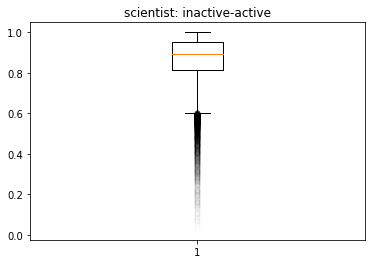

[0.023052365355114224]

In [11]:
accuracy('scientist', 'inactive-active')

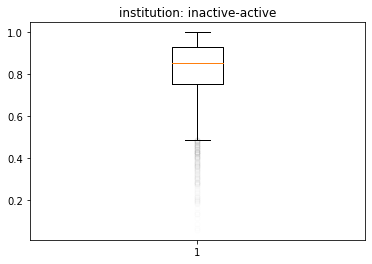

0.03742295274434987

In [23]:
accuracy('institution', 'inactive-active')

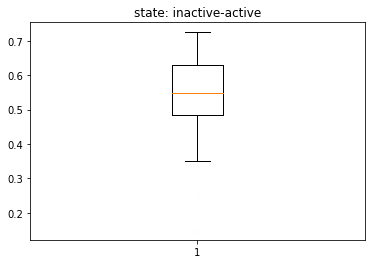

0.2692307692307692

In [22]:
accuracy('state', 'inactive-active')

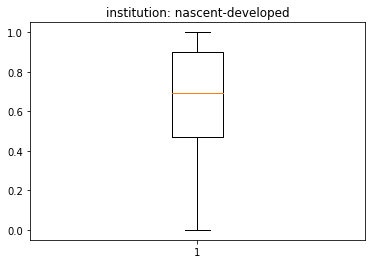

0.26480836236933797

In [42]:
accuracy('institution', 'nascent-developed')

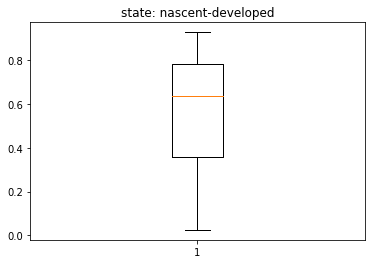

0.2857142857142857

In [26]:
accuracy('state', 'nascent-developed')

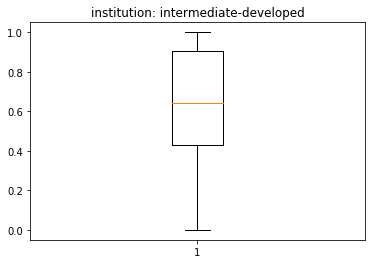

0.28205128205128205

In [43]:
accuracy('institution', 'intermediate-developed')

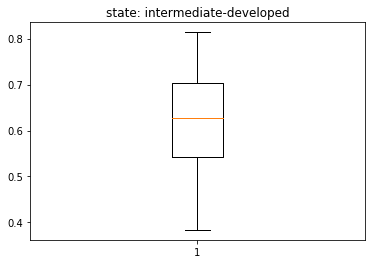

0.18518518518518517

In [27]:
accuracy('state', 'intermediate-developed')